In [0]:
import math 
from cmath import e
import numpy as np
import pylab

from scipy import misc
import matplotlib.pyplot as plt
from numpy import array, zeros, diag, diagflat, dot

!mkdir pastinha
!ls pastinha

from google.colab import files

mkdir: cannot create directory ‘pastinha’: File exists


#Métodos Diretos


##Método Eliminação de Gauss 

In [0]:
def extended_matrix(A,B):
    return np.append(A, B, axis=1)

def gaussian_elimination(A, B):
    
    #checa se a matriz é singular
    #if is_singular(A):
     #   raise ValueException("Matriz é singular!")


    U = np.array(extended_matrix(A, B), dtype="float64")

    
    n = U.shape[0]

    # matriz triangularizada
    for i in range(n):
        for j in range(i + 1, n):
            factor = U[j,i] / U[i,i]

            for k in range(n + 1):
                U[j,k] -= U[i,k] * factor

    # diagoniza a matriz
    for i in range(n - 1, -1, -1):
        for j in range(i - 1, -1, -1):
            factor = U[j,i] / U[i,i]

            for k in range(n + 1):
                U[j,k] -= U[i,k] * factor

    
    for i in range(n):
        U[i,n] /= U[i,i]
        U[i,i] /= U[i,i]

    # retorna a ultima coluna de x
    return U[:,n:n+1]


def augment_that_sucker(mat1, mat2):
	"""
	Duct-tape mat2's columns to the right of mat1
	Return a new matrix.
	"""
	retval = []
	for i in range(len(mat1)):
		r = mat1[i]
		newrow = r[:] + mat2[i]
		retval.append(newrow)
	return retval

def from_vector(vector):
	"""
	Convert a vector into a column matrix.
	"""
	retval = []
	for r in vector:
		retval.append([r])
	return retval

def transpose(mat):
	"""
	Return a transposed version of mat.
	"""
	retval = []
	for c in range(len(mat[0])):
		newrow = []
		for r in range(len(mat)):
			newrow.append(mat[r][c])
		retval.append(newrow)
	return retval



mat = np.array([[2,3,-1],[4,4,-3],[2,-3,1]])

mat2 = from_vector([5,3,-1])

#mattest3 = augment_that_sucker(mattest, mattest2)			

gaussian_elimination(mat, mat2)



array([[1.],
       [2.],
       [3.]])

##LU Decomposição

In [0]:
def lu(mat):
    
    n = len(mat)
    
    lower = [[0 for x in range(n)]  
                for y in range(n)]; 
    upper = [[0 for x in range(n)]  
                for y in range(n)]; 

    # Fatorando a matriz triangular superior e inferior
    for i in range(n): 

        # superior 
        for k in range(i, n):  

            # somatório de L(i, j) * U(j, k) 
            sum = 0; 
            for j in range(i): 
                sum += (lower[i][j] * upper[j][k]); 

            # calculando U(i, k) 
            upper[i][k] = mat[i][k] - sum; 

        # inferior 
        for k in range(i, n): 
            if (i == k): 
                lower[i][i] = 1; 
            else: 

                # somátorio de L(k, j) * U(j, i) 
                sum = 0; 
                for j in range(i): 
                    sum += (lower[k][j] * upper[j][i]); 

                # calculando L(k, i) 
                lower[k][i] = float((mat[k][i] - sum) /
                                       upper[i][i]); 

    return [lower, upper]

In [0]:
def sub2(L,U,B):
    
    # substituicao Ly = B
    
    y = np.zeros(B.size)
    for m, b in enumerate(B.flatten()):
        y[m] = b
        #print(m)
        # skip for loop if m == 0
        if m:
            for n in range(m):
                y[m] -= y[n] * L[m,n]
        y[m] /= L[m, m]
    #print(y)
    # # substituicao Ux = y 
    
    x = np.zeros(B.size)
    lastidx = B.size - 1  # ultimo index
    for midx in range(B.size):
        m = B.size - 1 - midx  
        x[m] = y[m]
        if midx:
            for nidx in range(midx):
                n = B.size - 1  - nidx
                x[m] -= x[n] * U[m,n]
        x[m] /= U[m, m]
    return x

In [0]:


e1 =np.array( [[4, -1,  3,  8, 43],
     [1,  6,  2, -3,  7],
     [5,  5,  1,  0,  8],
     [2,  4, -2,  1,  8]], dtype = "float64")

# solução esperada: (2.4426, 3.3934, 3.2459, 5.8033) (https://www.wolframalpha.com/input/?i=4a+-b+%2B3c+%2B+8d+%3D+43%2C+a+%2B+6b+%2B+2c+-3d+%3D+7%2C+2a+%2B+4b+-2c+%2B+d+%3D+8%2C+5a+%2B+5b+%2Bc+%3D+8)
m = np.array([[3,2,4,1],[1,1,2,2],[4,3,-2,3]])
#lu = lu(e1)


#b = np.array([1,2,3])
#b =  np.array([43,7,8,8])
#print(lu[0])
#print(lu[1])

#print(np.array_str(sub2(np.around(lu[0], decimals=6), np.around(lu[1], decimals=6), b), precision = 4) )
#print(np.array_str(sub2(np.around(lu[0], decimals=6), np.around(lu[1], decimals=6), b), precision = 4) )


##Cholesky

In [0]:
 def cholesky(A):    
    n = len(A)
    
    L = [[0.0] * n for i in range(n)]
    
    for i in range(n):
        for k in range(i+1):
            suma = sum(L[i][j]* L[k][j] for j in range(k))

            if (i==k):
                L[i][k] = math.sqrt(A[i][i] - suma)
            else:
                L[i][k] = (1.0 / L[k][k]* (A[i][k] - suma))

    return L 


A= np.array([[ 9, -6,  3, -3],[-6, 29, -7, -8],[ 3, -7, 18, 33]])
B = np.array([-3,-8,33])
g = cholesky(A)
gt = transpose(g)

#print(A)


print(np.array_str(sub2(np.around(g, decimals=6), np.around(gt, decimals=6), B), precision = 4) )


[-1.  0.  2.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


## Resolução da Lista 6

###Exercício 1

In [0]:
mat = np.array([[-2,  3,  1, -5],[ 2,  1, -4, -9],[ 7, 10, -6,  2]])

mat2 = from_vector([-5,-9,2])


gaussian_elimination(mat,mat2)

array([[ 4.34951456],
       [-0.22330097],
       [ 4.36893204]])

In [0]:

mat = [[ 1, -3,  5,  6,  17],[-9,  4, -1,  0,  29],[ 3,  2, -2,  7, -11],[ 1,  2,  5, -4,  7 ]]

mat2 = from_vector([17,29,-11,7])




gaussian_elimination(mat,mat2)

array([[-3.64516129],
       [-0.21935484],
       [ 2.92903226],
       [ 0.89032258]])

In [0]:
mat = [[-2, 3,  1,  5,  2], [ 5, 1, -1,  0, -1],[ 1, 6,  3, -1,  0],[ 4, 5,  2,  8,  6]]

mat2 = from_vector([2,-1,0,6])


gaussian_elimination(mat,mat2)

array([[ 0.31421446],
       [-0.81795511],
       [ 1.75311721],
       [ 0.66583541]])

In [0]:
#erro por causa do pivotamento
mat = [[ 0,  1, 3,  2, 4,  3],[ 8, -2, 9, -1, 2, -5],[ 5,  1, 1,  7, 2,  6],[-2,  4, 5,  1, 0, -1],[ 7, -3, 2, -4, 1,  8]]

mat2 = from_vector([3,-5,6,-1,8])


gaussian_elimination(mat,mat2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars


array([[nan],
       [nan],
       [nan],
       [nan],
       [nan]])

###Exercício 2

In [0]:


e1 =np.array( [[4, -1,  3,  8, 43],[1,  6,  2, -3,  7],[5,  5,  1,  0,  8], [2,  4, -2,  1,  8]], dtype = "float64")

a = lu(e1)

b =  np.array([43,7,8,8])


print(np.array_str(sub2(np.around(a[0], decimals=6), np.around(a[1], decimals=6), b), precision = 4) )


[-2.4426  3.3934  3.2459  5.8033]


In [0]:

e2 = np.array( [[ 3, -2, -1,  7,  3,  45],[-1,  1,  3, -2, -3,  -8], [ 8,  4, -1,  0,  2,   8], [ 2, -3,  2,  5,  0, -18],[-1,  3,  0, -8, -2,   0]], dtype = "float64")

q2 = lu(e2)

b =  np.array([45,-8,8,-18,0])


print(np.array_str(sub2(np.around(q2[0], decimals=6), np.around(q2[1], decimals=6), b), precision = 4) )


[-68.3801  27.4996 280.0796 -71.7799 362.5595]


In [0]:

e2 = np.array( [[ 4, 12, 14,  5,  2,  -1, 102],[ 1, -3, 12,  2,  3,  -2, 105],[-2,  4, 10, 10, -2,   0, -67],[ 7, -3, -5, 12,  8,  10,  18],[10,  7,  1,  8, 12,  -8, 100],[ 8, 10,  0, 11, -2,  15, -90]], dtype = "float64")

q3 = lu(e2)

b =  np.array([102,105,-67,18,100,-90])


print(np.array_str(sub2(np.around(q3[0], decimals=6), np.around(q3[1], decimals=6), b), precision = 4) )


[ -5.756    3.4637   7.4739 -12.1049  23.0287   6.7081]


###Exercício 3

In [0]:

A= np.array([[ 9, -6,  3, -3],[-6, 29, -7, -8],[ 3, -7, 18, 33]])
B = np.array([-3,-8,33])
g = cholesky(A)
gt = transpose(g)

#print(A)


print(np.array_str(sub2(np.around(g, decimals=6), np.around(gt, decimals=6), B), precision = 4) )


[-1.  0.  2.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


In [0]:

A= np.array([[ 4, -2,  4, 10,  2],[-2,  3, -1, -7,  2],[ 4, -1, 14, 11, -1],[10, -7, 11, 31, -2]])
B = np.array([2,2,-1,-2])
g = cholesky(A)
gt = transpose(g)

#print(A)


print(np.array_str(sub2(np.around(g, decimals=6), np.around(gt, decimals=6), B), precision = 4) )


[ 3.3235  0.7941 -0.2941 -0.8529]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


In [0]:

A= np.array([[ 1,  2,  -3, 0,   3,  17],[ 2,  5,  -1, 1,   4,  41],[-3, -1,  50, 1, -19, -45],[ 0,  1,   1, 6,   0,  30],[ 3,  4, -19, 0,   39, 51]])
B = np.array([17,41,-45,30,51])
g = cholesky(A)
gt = transpose(g)

#print(A)


print(np.array_str(sub2(np.around(g, decimals=6), np.around(gt, decimals=6), B), precision = 4) )


[-2.2487  7.9688 -0.8588  3.815   0.245 ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


#Métodos Iterativos

##Linear

##Gauss Jacobi

In [0]:
def gauss_jacobi(A,b,N=4,x=None):
    list = []                                                                                                                                                          
    if x is None:
        x = zeros(len(A[0]))
                                                                                                                                                                   
    D = diag(A)
    R = A - diagflat(D)
                                                                                                                                                                        
    for i in range(N):
        x = (b - dot(R,x)) / D
        list.append(x)
    return list

A = np.array([[2.0,1.0],[5.0,7.0]])
b = np.array([11.0,13.0])

guess = np.array([1.0,1.0])

gauss_jacobi(A,b,N=4,x=guess)


[array([5.        , 1.14285714]),
 array([ 4.92857143, -1.71428571]),
 array([ 6.35714286, -1.66326531]),
 array([ 6.33163265, -2.68367347])]

In [0]:
#a)
#m = np.array([[1,  1,  3],[1, -3, -3]], dtype = "float64")
A = np.array([[1,1],[1,-3]])
b = np.array([3,-3])
guess = np.array([1.0,1.0])    


lista_j1 = gauss_jacobi(A,b,N=4,x=guess)

In [0]:
#b)
#m = np.array([[1,  1,  3],[1, -3, -3]], dtype = "float64")
A = np.array([[1,-3],[1,1]])
b = np.array([-3,3])
guess = np.array([1.0,1.0])     


lista_j2 = gauss_jacobi(A,b,N=4,x=guess)

In [0]:
#c)
#m = np.array([[1,  1,  3],[1, -3, -3]], dtype = "float64")
A = np.array([[2,5],[3,1]])
b = np.array([-3,2])
guess = np.array([1.0,1.0])      


lista_j3 = gauss_jacobi(A,b,N=4,x=guess)

In [0]:
#d)
A = np.array([[3,1],[2,5]])
b = np.array([2,-3])
guess = np.array([1.0,1.0])     


lista_j4 = gauss_jacobi(A,b,N=4,x=guess)

##Gauss Seidel

In [0]:
def gauss_seidel(A, b, x, N, tol):
    
    maxI = 4
    xprev = [0.0 for i in range(N)]
    lista = []
    for i in range(maxI):

        for j in range(N):
            xprev[j] = x[j]
        for j in range(N):
            summ = 0.0
            for k in range(N):
                if (k != j):
                    summ = summ + A[j][k] * x[k]
            x[j] = (b[j] - summ) / A[j][j]
            #lista.append(x)

        diff1norm = 0.0
        oldnorm = 0.0
        lista.extend(x)
        #print(x)

        for j in range(N):
            diff1norm = diff1norm + abs(x[j] - xprev[j])
            oldnorm = oldnorm + abs(xprev[j])  
        if oldnorm == 0.0:
            oldnorm = 1.0
        norm = diff1norm / oldnorm
        if (norm < tol) and i != 0:
            print("Convergiu em [", end="")
            for j in range(N - 1):
                print(x[j], ",", end="")
            print(x[N - 1], "]. Levou", i + 1, "iteracoes.")
            return
    li = [0]*4
    for i in range(4):
        li[i] = [lista[i], lista[i+1]]


    print("Não convergiu D:")
    return li
    
    
                

matrix2 = [[3.0, 1.0], [2.0, 6.0]]
vector2 = [5.0, 9.0]
guess = [0.0, 0.0]

matrix3 = [[9.0, -3.0], [-2.0, 8.0]]
vector3 = [6.0, -4.0]


matrix4 = [[1.0, -3.0], [-2.0, 8.0]]

gauss_seidel(matrix2, vector2, guess, 2, 0.00001)
gauss_seidel(matrix3, vector3, guess, 2, 0.00001)
gauss_seidel(matrix4, vector3, guess, 2, 0.00001)

Não convergiu D:
Não convergiu D:
Não convergiu D:


[[4.909297213260738, 0.7273243033151846],
 [0.7273243033151846, 8.181972909945554],
 [8.181972909945554, 1.5454932274863884],
 [1.5454932274863884, 10.636479682459164]]

In [0]:
#a) 

A = np.array([[1,1],[1,-3]])
b = np.array([3,-3])
guess = np.array([1.0,1.0])    
lista_s1 = gauss_seidel(A,b, guess, 2, 0.00000000000001)

Não convergiu D:


In [0]:
#b) 

A = np.array([[1,-3],[1,1]])
b = np.array([-3,3])
guess = np.array([1.0,1.0])    
lista_s2 =gauss_seidel(A,b, guess, 2, 0.00000000000001)

Não convergiu D:


In [0]:
#c) 

A = np.array([[2,5],[3,1]])
b = np.array([-3,2])
guess = np.array([1.0,1.0])    
lista_s3 =gauss_seidel(A,b, guess, 2, 0.00000000000001)

Não convergiu D:


In [0]:
#d) 

A = np.array([[3,1],[2,5]])
b = np.array([2,-3])
guess = np.array([1.0,1.0])    
lista_s4 =gauss_seidel(A,b, guess, 2, 0.00000000000001)

Não convergiu D:


##Não Linear

##Newton

In [0]:
def Newton(F, J, x, eps):
    F_value = F(x)
    F_norm = np.linalg.norm(F_value, ord=3) 
    iteration_counter = 0
    while abs(F_norm) > eps and iteration_counter < 100:
        delta = np.linalg.solve(J(x), -F_value)
        x = x + delta
        F_value = F(x)
        F_norm = np.linalg.norm(F_value, ord=3)
        iteration_counter += 1

    
    if abs(F_norm) > eps:
        iteration_counter = -1
    return x, iteration_counter

In [0]:

def test():
    from numpy import cos, sin, pi, exp

    def F(x):
        return np.array(
            [x[0]**2 - x[1] + x[0]*cos(pi*x[0]),
             x[0]*x[1] + exp(-x[1]) - x[0]**(-1)], dtype='float32')

    def J(x):
        return np.array(
            [[2*x[0] + cos(pi*x[0]) - pi*x[0]*sin(pi*x[0]), -1],
             [x[1] + x[0]**(-2), x[0] - exp(-x[1])]],dtype='float32')

    expected = np.array([1, 0], dtype='float32')
    tol = 1e-4
    x, n = Newton(F, J, x=np.array([2, -1], dtype='float32'), eps=0.0001)
    print (n, x)
    error_norm = np.linalg.norm(expected - x, ord=2)
    assert error_norm < tol, 'norm of error =%g' % error_norm
    print ('norm of error =%g' % error_norm)
    
test()

4 [ 1.0000001e+00 -1.0078074e-06]
norm of error =1.01483e-06


##Gráficos


In [0]:
def plot(sistema, lista, horizontalWindow = (None, None), resolution = 100):
    approximation_array = np.array(lista)
    a, b = horizontalWindow
    
    
    if not a:
        a = approximation_array[:, 0].min()
        b = approximation_array[:, 0].max()

    A = np.array(sistema, dtype="float64")
    f1 = lambda x1: (A[0, 2] - A[0, 0]*x1) / A[0, 1]
    
    f2 = lambda x2: (A[1, 2] - A[1, 0]*x2) / A[1, 1]

    xs = np.linspace(a, b, resolution)
    y1 = list(map(f1, xs))
    y2 = list(map(f2, xs))
    
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(111)

    plt.plot(xs, y1, '-r', label='y = 3 - x')
    plt.plot(xs, y2, '-b', label='y2 = (x + 3) / 3')

    left,right = ax.get_xlim()
    low,high = ax.get_ylim()
    pylab.arrow( left, 0, right -left, 0, length_includes_head = True, head_width = 0.15 )
    pylab.arrow( 0, low, 0, high-low, length_includes_head = True, head_width = 0.15 )

    for i, ponto in enumerate(lista):
        x,y = ponto
        plt.plot(x, y, '.g')
        ax.annotate('x('+str(i)+')', (x, y))
        
 

##Jacobi

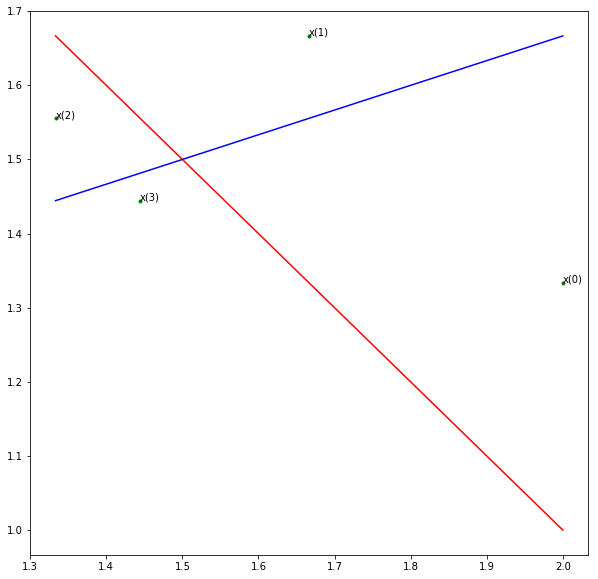

In [0]:
       
plot(np.array([[1,  1,  3],
        [1, -3, -3]], dtype="float64"), np.array(lista_j1,dtype="float64") )

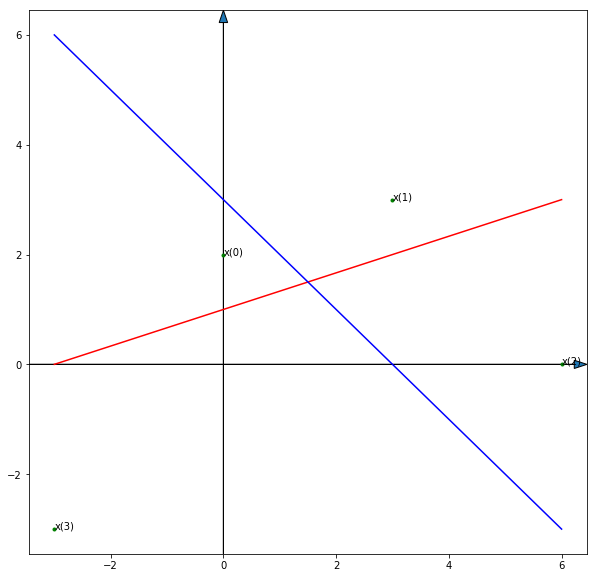

In [0]:
       
plot(np.array([[1, -3, -3],
        [1,  1,  3]], dtype="float64"), np.array(lista_j2,dtype="float64") )

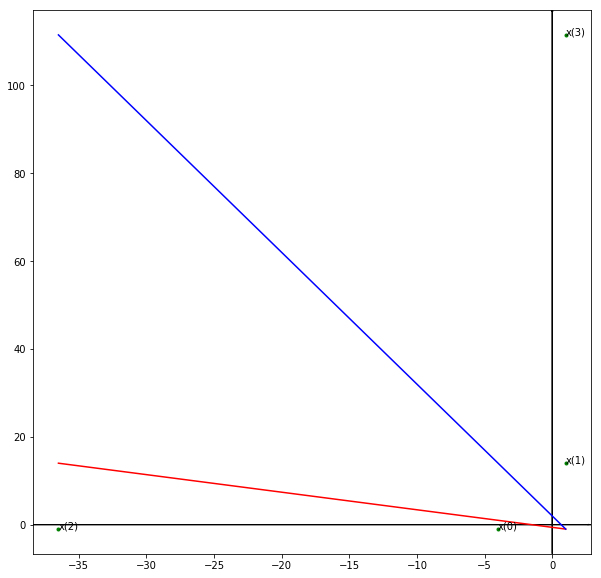

In [0]:
       
plot(np.array([[2, 5, -3],
        [3, 1,  2]], dtype="float64"), np.array(lista_j3,dtype="float64") )

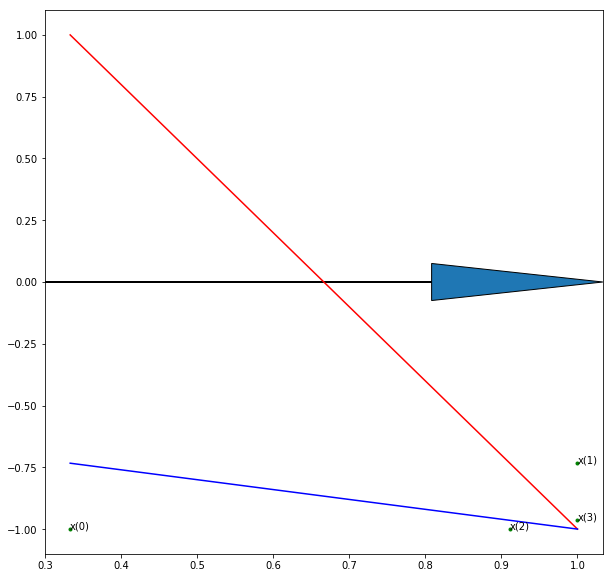

In [0]:
       
plot(np.array([[3, 1,  2],
           [2, 5, -3]], dtype="float64"), np.array(lista_j4,dtype="float64") )

##Seidel

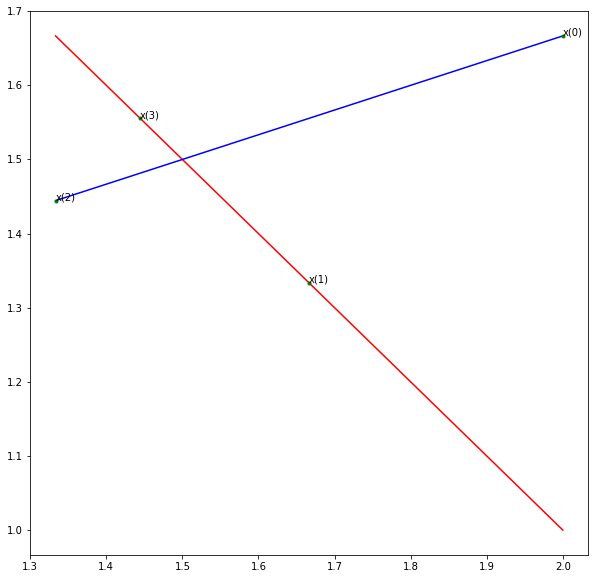

In [0]:
plot(np.array([[1,  1,  3],
        [1, -3, -3]], dtype="float64"), np.array(lista_s1,dtype="float64") )

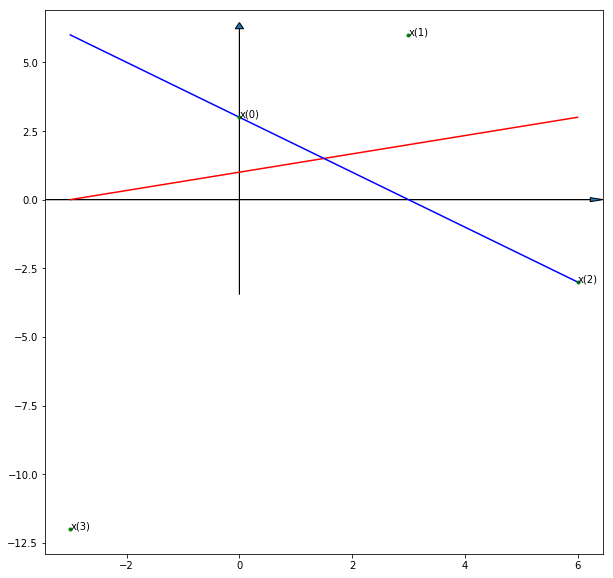

In [0]:
plot(np.array([[1, -3, -3],
        [1,  1,  3]], dtype="float64"), np.array(lista_s2,dtype="float64") )

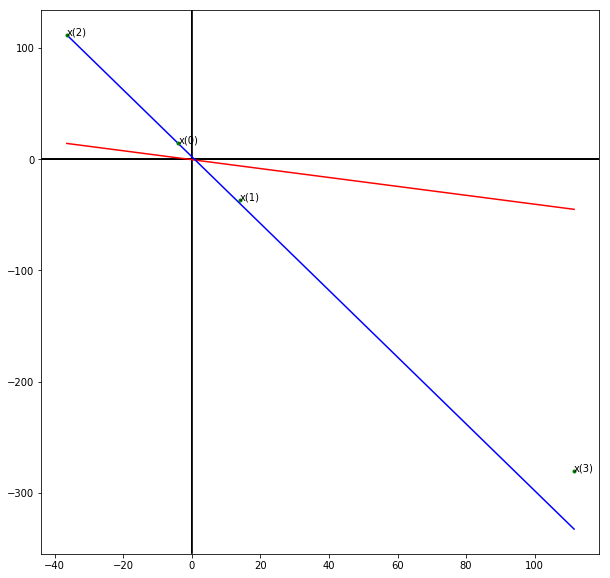

In [0]:
plot(np.array([[2, 5, -3],
        [3, 1,  2]], dtype="float64"), np.array(lista_s3,dtype="float64") )

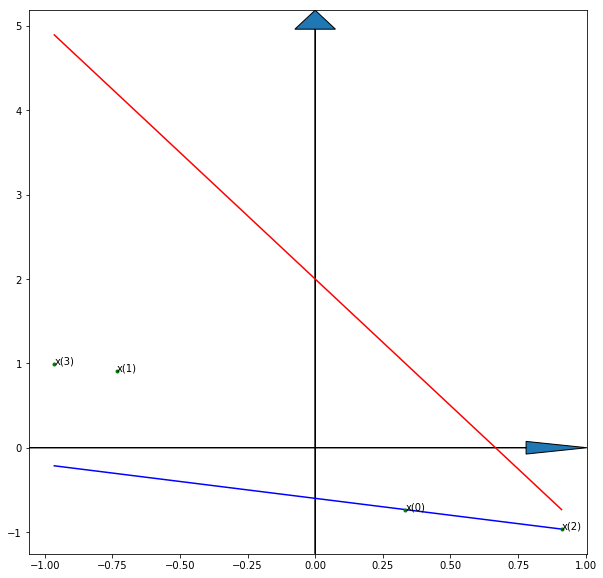

In [0]:
plot(np.array([[3, 1,  2],
           [2, 5, -3]], dtype="float64"), np.array(lista_s4,dtype="float64") )